In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import warnings
warnings.simplefilter('ignore', FutureWarning)


from torchvision import models
import torch


import random
import glob
from PIL import Image
import PIL.ImageOps

In [ ]:
categories = ['beetles', 'cockroach', 'dragonflies']
num_augmented_images = 50

for category in categories:
  file_path = '/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/train/' + category + '/'
  file_names = os.listdir(file_path)
  total_origin_image_num = len(file_names)                                   
  
  for i in range(1, total_origin_image_num):
    augment_cnt = 1
    change_picture_index = random.randrange(1, total_origin_image_num-1)
#    print(change_picture_index)
#    print(file_names[change_picture_index])
    file_name = file_names[change_picture_index]
    
    origin_image_path = '/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/train/' + category + '/' + file_name
    print(origin_image_path)
    image = Image.open(origin_image_path)
#    random_augment = random.randrange(1,6)
    
#    if(random_augment == 1):
      #이미지 좌우 반전
    print("invert")
    inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.png')

#    elif(random_augment == 2):
      # 이미지 상하 반전
    print('updown')
    updown_image = image.transpose(Image.FLIP_TOP_BOTTOM)
    updown_image.save(file_path + 'updown_' + str(augment_cnt) + '.png')
        
#    elif(random_augment == 3):
      #이미지 기울이기
    print("rotate")
    rotated_image = image.rotate(random.randrange(-20, 20))
    rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.png')

#    elif(random_augment == 4):
      #이미지 흑백으로
    print("rotate")
    blackwhite_image = image.convert('1')
    blackwhite_image.save(file_path + 'blackwhite_' + str(augment_cnt) + '.png')
        
#    elif(random_augment == 5):
      #노이즈 추가하기
    img = cv2.imread(origin_image_path)
    print("noise")
    row,col,ch= img.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy_array = img + gauss
    noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
    noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.png')
        
 #   augment_cnt += 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
rotate
noise
/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/train/beetles/5558671.jpg
invert
updown
rotate
rotate
noise
/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/train/beetles/5556643.jpg
invert
updown
rotate
rotate
noise
/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/train/beetles/5559813.jpg
invert
updown
rotate
rotate
noise
/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/train/beetles/5558604.jpg
invert
updown
rotate
rotate
noise
/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/train/beetles/5556641.jpg
invert
updown
rotate
rotate
noise
/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/train/beetles/5559724.jpg
invert
updown
rotate
rotate
noise
/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/train/beetles/5556734.jpg
invert
updown
rotate
rotate
noise
/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/tra

# 곤충데이터셋 load (class 3, 각 train 280, test 60)

In [ ]:
def read_directory(directory_name, remove_directory = None):
    ''' 
    Read all images in the directory. 
    And resize them using zero padding to make them in the same shape.
    Since some images appear in both the training set and the test set, I need to remove them from the training set.
    '''
    
    array_of_img = []
    for filename in os.listdir(directory_name):
        if remove_directory is not None and filename in os.listdir(remove_directory):
            continue
        img = cv2.imread(directory_name + '/' + filename)
        if img is not None:
            img = cv2.resize(img, dsize=(84, 84), interpolation=cv2.INTER_CUBIC)
            array_of_img.append(img)
    return array_of_img

def see_image(img):
    ''' For display convenience, change RGB to BGR.'''
    return(img[:,:,::-1])

In [ ]:
## read data and resize to ()
categories = ['beetles', 'cockroach', 'dragonflies']
X_train = []
y_train = []
X_test = []
y_test = []

for category in categories:    
    xx = read_directory(r'/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/test/' + category)
    #xx = xx[:len(xx)-1]  ## the last one is 'None'
    yy = np.repeat(category, len(xx))
    X_test += list(xx)
    y_test += list(yy)
    
    x = read_directory(r'/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/train/' + category, r'/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/insects_tl/test/' + category)
    y = np.repeat(category, len(x))
    #print(len(y))
    X_train += list(x)
    y_train += list(y)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(854, 854, 180, 180)

In [ ]:
# data_preprocessing

batch_size = 32

## encode labels
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

X_train_tensor = torch.Tensor(np.array(X_train) / 255) # transform to torch tensor
y_train_tensor = torch.Tensor(y_train).long()
X_test_tensor = torch.Tensor(np.array(X_test) / 255)
y_test_tensor = torch.Tensor(y_test).long()

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor) # create datset
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

# create data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True) 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# 해충 데이터셋 load (class 41, 각 train 60, test 3)

In [ ]:
transfer_train_data_dir = '/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/pest_tl/train'
transfer_test_data_dir = '/content/drive/Shareddrives/2022 데이터 청년 캠퍼스/pest_tl/test'

In [ ]:
import torchvision
from torchvision import datasets,models, transforms

train_data_transforms = transforms.Compose([transforms.RandomResizedCrop(84),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.497,0.536,0.347],[0.166,0.163,0.165])
                                            ])

test_data_transforms = transforms.Compose([transforms.RandomResizedCrop(84),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.480,0.532,0.340],[0.166, 0.159, 0.160])
                                            ])

transfer_train_dataset = torchvision.datasets.ImageFolder(root = transfer_train_data_dir, transform = train_data_transforms)
transfer_test_dataset = torchvision.datasets.ImageFolder(root = transfer_test_data_dir, transform = test_data_transforms)

In [ ]:
transfer_train_loader = torch.utils.data.DataLoader(dataset=transfer_train_dataset, batch_size=batch_size, shuffle=True) 
transfer_test_loader = torch.utils.data.DataLoader(dataset=transfer_test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
def train(model, device, train_loader, criterion, optimizer, epoch):
    train_loss = 0
    correct = 0
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = Variable(data.reshape(-1, 3, 84, 84))
        #print(data.shape)
        target = Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()  # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        if batch_idx == len(train_loader)-1:
            print('Epoch {}, Training Loss: {:.4f}'.format(epoch, train_loss/(batch_idx+1)))
    acc = correct / len(train_loader.dataset)
    return(acc)
            
            
def test(model, device, test_loader, criterion, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = Variable(data.reshape(-1, 3, 84, 84))
            target = Variable(target)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    acc = correct / len(test_loader.dataset)
    #test_loss = (test_loss*batch_size)/len(test_loader.dataset)
    print('Test{}: Accuracy: {:.4f}%'.format(epoch, 100. * acc))
    return(acc)

# model (pretrained resnet)

In [ ]:
from torchvision import models
import torch
import torch.nn as nn

device = 'cuda'
model = models.resnet50(pretrained=True).to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
# freezing

for param in model.parameters():
    param.requires_grad = False

In [ ]:
# 마지막 layer output class 바꿔주기

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)

model = model.to(device)

In [ ]:
for p in model.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


# 곤충데이터셋 학습(freezing O)

In [ ]:
device = 'cuda'
device = torch.device(device)
num_epochs = 10
# in_channels = 3
# out_channels = 3 
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
optimizer = optim.Adam(model.parameters(),lr=0.001)

train_acc = []
test_acc = []
for epoch in range(1, num_epochs + 1):
    train_acc.append(train(model, device, train_loader, criterion, optimizer, epoch))
    acc = test(model, device, test_loader, criterion, epoch)
    test_acc.append(acc)
    if epoch == 1 or old < acc:
        torch.save(model.state_dict(), 'ckpt_cnn.pth')
        old = acc

Epoch 1, Training Loss: 0.8617
Test1: Accuracy: 56.1111%
Epoch 2, Training Loss: 0.5714
Test2: Accuracy: 59.4444%
Epoch 3, Training Loss: 0.5112
Test3: Accuracy: 60.5556%
Epoch 4, Training Loss: 0.4830
Test4: Accuracy: 60.5556%
Epoch 5, Training Loss: 0.4369
Test5: Accuracy: 63.3333%
Epoch 6, Training Loss: 0.4468
Test6: Accuracy: 62.2222%
Epoch 7, Training Loss: 0.4588
Test7: Accuracy: 62.7778%
Epoch 8, Training Loss: 0.4477
Test8: Accuracy: 64.4444%
Epoch 9, Training Loss: 0.4009
Test9: Accuracy: 62.2222%
Epoch 10, Training Loss: 0.4128
Test10: Accuracy: 66.1111%
Epoch 11, Training Loss: 0.3740
Test11: Accuracy: 66.6667%
Epoch 12, Training Loss: 0.3908
Test12: Accuracy: 67.7778%
Epoch 13, Training Loss: 0.4232
Test13: Accuracy: 62.7778%
Epoch 14, Training Loss: 0.3494
Test14: Accuracy: 67.7778%
Epoch 15, Training Loss: 0.3613
Test15: Accuracy: 67.2222%
Epoch 16, Training Loss: 0.3326
Test16: Accuracy: 65.0000%
Epoch 17, Training Loss: 0.3657
Test17: Accuracy: 62.7778%
Epoch 18, Train

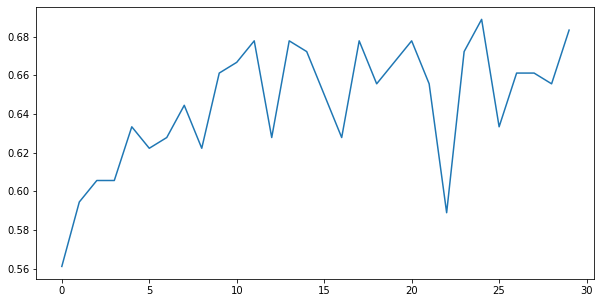

In [ ]:
plt.figure(figsize=(10,5)) # high variance -> need more data
plt.plot(test_acc)
plt.show() 

# 해충데이터셋 학습(freezing x)

In [ ]:
model = model.to(device)
model.load_state_dict(torch.load('ckpt_cnn.pth'))

for param in model.parameters():
    param.requires_grad = True
    
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 41)

model = model.to(device)

In [ ]:
device = 'cuda'
device = torch.device(device)
num_epochs = 10

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
optimizer = optim.Adam(model.parameters(),lr=0.0001) # lr 0.001 => 0.0001

train_acc = []
test_acc = []
for epoch in range(1, num_epochs + 1):
    train_acc.append(train(model, device, transfer_train_loader, criterion, optimizer, epoch))
    acc = test(model, device, transfer_test_loader, criterion, epoch)
    test_acc.append(acc)
#    if epoch == 1 or old < acc:
#        torch.save(model.state_dict(), 'ckpt_cnn.pth')
#        old = acc

Epoch 1, Training Loss: 3.4903
Test1: Accuracy: 20.3252%
Epoch 2, Training Loss: 2.5388
Test2: Accuracy: 36.5854%
Epoch 3, Training Loss: 1.8660
Test3: Accuracy: 47.1545%
Epoch 4, Training Loss: 1.3576
Test4: Accuracy: 40.6504%
Epoch 5, Training Loss: 0.9869
Test5: Accuracy: 52.0325%
Epoch 6, Training Loss: 0.7865
Test6: Accuracy: 49.5935%
Epoch 7, Training Loss: 0.6532
Test7: Accuracy: 51.2195%
Epoch 8, Training Loss: 0.4848
Test8: Accuracy: 48.7805%
Epoch 9, Training Loss: 0.4239
Test9: Accuracy: 54.4715%
Epoch 10, Training Loss: 0.3880
Test10: Accuracy: 56.0976%


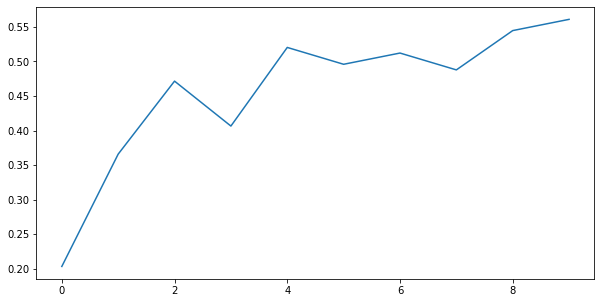

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test_acc)
plt.show()